In [1]:
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.reset_defaults()
sns.set_theme(rc={'figure.dpi': 72, 'savefig.dpi': 300,
              'figure.autolayout': True})
sns.set_style('ticks')
sns.set_context('paper')


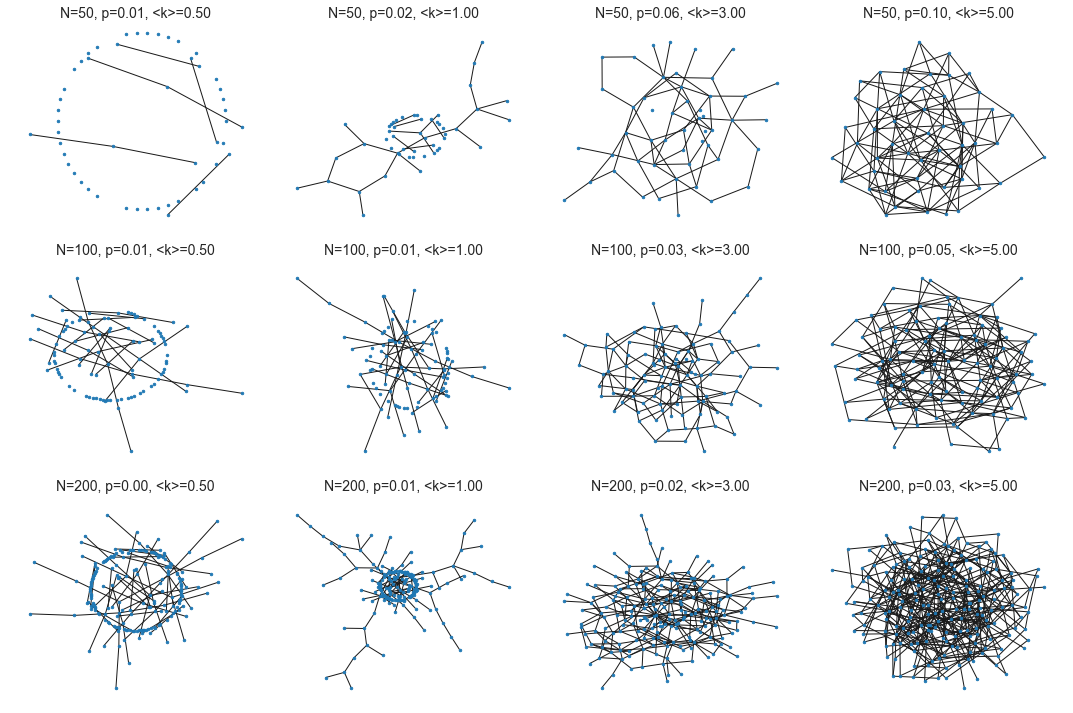

In [5]:
n_vals = (50, 100, 200)
p_map = lambda n: (0.5/(n-1), 1/(n-1), 3/(n-1), 5/(n-1))

p_vals = list(map(p_map, n_vals))
fig, ax = plt.subplots(len(n_vals), len(p_vals[0]), figsize=(15, 10))
for ni, n in enumerate(n_vals):
    for pi, p in enumerate(p_vals[ni]):
        g = nx.erdos_renyi_graph(n=n, p=p)
        gcc = sorted(nx.connected_components(g), key=len, reverse=True)[0]
        k = p * (n-1)
        nx.draw_kamada_kawai(g, node_size=7, ax=ax[ni][pi])
        ax[ni][pi].set_title(f"N={n}, p={p:.2f}, <k>={k:.2f}", fontsize=14)
fig.savefig('q2-1.png')
fig


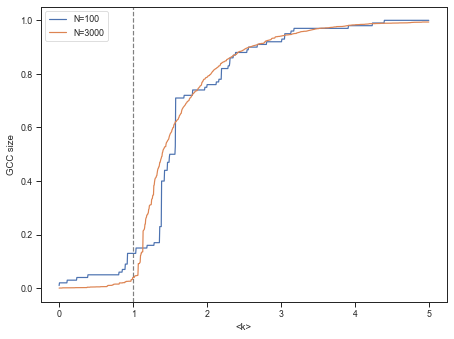

In [13]:
n_vals = (100, 3000)
fig, ax = plt.subplots()
ax.set(xlabel="<k>", ylabel="GCC size")
ax.axvline(1, ls='--', c='gray')
for n in n_vals:
    p_vals = np.linspace(.0, 5/(n-1), 1000)
    k_vals = p_vals * (n-1)
    gcc_vals = []
    for p in p_vals:
        g = nx.erdos_renyi_graph(n=n, p=p, seed=2)
        gcc = sorted(nx.connected_components(g), key=len, reverse=True)[0]
        gcc_vals.append(len(gcc) / n)
    sns.lineplot(x=k_vals, y=gcc_vals, label=f"N={n}", ax=ax)
fig.savefig('q2-2.png')
fig
